# Deep Neural Network for Image Classification: Lingon classification

The developed model is based on Cousera Course-lab "Deep Neural Network for Image Classification: Application" - by Andrew Ng

The purpose of the adaptation of the lab and algorithm is to be able to selecet lingonberries from scrap and other type of berries.

An utility file is developed (lingon_utils.py) to pre-process the labeled images to fit the required input formats for the algoritm. The sets are stored in sub-directories within "./datasets"-directory.. 



## 1 - Packages

Let's first import all the packages that you will need during this assignment. 
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.
- dnn_app_utils provides the functions implemented in the "Building your Deep Neural Network: Step by Step" assignment to this notebook.
- np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work.

In [23]:
import time
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import scipy - removes due to depricication of scipy.misc.imresize, solution changed to  plt.imshow
from PIL import Image
#from scipy import ndimage - solution changed to PIL - image based.
from dnn_app_utils_v3 import *

from lingon_hdf_util import load_lingonset 

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

## 2 - Dataset

You will use the same "Cat vs non-Cat" dataset as in "Logistic Regression as a Neural Network" (Assignment 2). The model you had built had 70% test accuracy on classifying cats vs non-cats images. Hopefully, your new model will perform a better!

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labelled as cat (1) or non-cat (0)
    - a test set of m_test images labelled as cat and non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

Let's get more familiar with the dataset. Load the data by running the cell below.

In [2]:
#List available datasets
set_dir = "../Create_hdf5_datasets/data_sets"

for data_set in os.listdir(set_dir):
    print(data_set)

First_lr_test_m52_1024x1024x3_T0.65.h5
First_lr_test_m52_128x128x3_T0.65.h5
First_lr_test_m52_256x256x3_T0.65.h5
First_lr_test_m52_512x512x3_T0.65.h5
First_lr_test_m52_64x64x3_T0.65.h5
First_lr_train_m210_1024x1024x3_T0.35.h5
First_lr_train_m210_128x128x3_T0.35.h5
First_lr_train_m210_256x256x3_T0.35.h5
First_lr_train_m210_512x512x3_T0.35.h5
First_lr_train_m210_64x64x3_T0.35.h5
Second_lr_test_m100_1024x1024x3_T0.30.h5
Second_lr_test_m100_128x128x3_T0.30.h5
Second_lr_test_m100_256x256x3_T0.30.h5
Second_lr_test_m100_512x512x3_T0.30.h5
Second_lr_test_m100_64x64x3_T0.30.h5
Singel_lingon_scrap_berries_inhouse_m1000_1024x1024x3_T0.40.h5
Singel_lingon_scrap_berries_inhouse_m1000_128x128x3_T0.40.h5
Singel_lingon_scrap_berries_inhouse_m1000_256x256x3_T0.40.h5
Singel_lingon_scrap_berries_inhouse_m1000_512x512x3_T0.40.h5
Singel_lingon_scrap_berries_inhouse_m1000_64x64x3_T0.40.h5
Singel_lingon_scrap_berries_inhouse_m211_1024x1024x3_T0.35.h5
Singel_lingon_scrap_berries_inhouse_m211_128x128x3_T0.35.h

In [3]:
#Load the selected trainset with classes, imagenames in sequence, datalabels with load_lingonset ("name of set")  within lingon_hdf_util
train_x_orig, train_y, train_set_images, classes = load_lingonset('Singel_lingon_scrap_berries_inhouse_m211_64x64x3_T0.35.h5')

In [4]:
print("Trainingset:")
print(type(train_x_orig))
print(train_x_orig.shape)
print(type(train_y))
print(train_y.shape)

print("Classes:")
print(type(classes))
print(classes) 

Trainingset:
<class 'numpy.ndarray'>
(211, 64, 64, 3)
<class 'numpy.ndarray'>
(1, 211)
Classes:
<class 'numpy.ndarray'>
[b'icke-lingon' b'lingon']


In [5]:
#Load dev/testestet 
test_x_orig, test_y, _, _ = load_lingonset('Singel_lingon_scrap_berries_inhouse_m52_64x64x3_T0.65.h5')

In [6]:
print("Testsetet:")
print(type(test_x_orig))
print(test_x_orig.shape)
print(type(test_y))
print(test_y.shape)
print(test_y[0,2])

Testsetet:
<class 'numpy.ndarray'>
(52, 64, 64, 3)
<class 'numpy.ndarray'>
(1, 52)
1


### Visual verification of train- and testsets ###

Steps:<br>
1) Visually verify separte images by label and array<br>
2) Visually verify  separate images by label and image

In [7]:
# Choose index for the picture
set_type = "train"
index =49
#y = train_set_y_orig[0, index]
if set_type == "train":
    print(set_type+":bild "+ str(index))
    print("y = " + str(train_y[0, index])+" ,"+str(classes[train_y[0, index]].decode('utf-8')))
    print(train_x_orig[index,:])
    
elif set_type == "test":
    print(set_type+":bild "+ str(index))
    print("y = " + str(test_y[0, index])+" ,"+str(classes[test_y[0, index]].decode('utf-8')))
    print (test_x_orig[index,:])

train:bild 49
y = 0 ,icke-lingon
[[[ 62  70  71]
  [ 63  71  70]
  [ 65  70  71]
  ...
  [132 111  89]
  [ 86  72  60]
  [ 66  57  52]]

 [[126 128 127]
  [128 128 128]
  [126 126 125]
  ...
  [204 173 139]
  [172 144 114]
  [ 84  70  61]]

 [[143 143 142]
  [143 143 142]
  [143 143 142]
  ...
  [230 201 167]
  [218 188 153]
  [153 128 105]]

 ...

 [[ 99 101 108]
  [100 100 106]
  [107 107 110]
  ...
  [132 121 109]
  [132 120 108]
  [132 120 108]]

 [[107  88  97]
  [113 115 116]
  [113 116 117]
  ...
  [129 118 107]
  [129 118 108]
  [129 117 107]]

 [[102  56  75]
  [111 109 112]
  [111 115 116]
  ...
  [126 116 106]
  [127 117 107]
  [127 116 107]]]


#### Visual verification of label and image using Pillow ####

train:bild 2 på index 1
y = 1 ,lingon


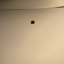

In [8]:
# välj index för bilden
set_type = "train"
index = 1  #startar med 0
# Testa bilderna i tränintsetet visuellt
if set_type == "train":
    y = train_y[0, index]
    print(set_type+":bild "+ str(index+1)+ " på index "+ str(index))
    print("y = " + str(train_y[0, index])+" ,"+str(classes[train_y[0, index]].decode('utf-8')))
    lingonbild = Image.fromarray(train_x_orig[index, :])
    display(lingonbild)

# Testa bilderna i testsetet visuellt
elif set_type == "test":
    y = test_set_y[0, index]
    print(set_type+":bild "+ str(index+1)+ " på index "+ str(index))
    print("y = " + str(test_y[0, index])+" ,"+str(classes[test_y[0, index]].decode('utf-8')))
    lingonbild = Image.fromarray(test_x_orig[index, :])
    display(lingonbild)
  

#### Visual verification of label and image using Matplotlib ####

train:bild 51 på index 50
y = 0 ,icke-lingon


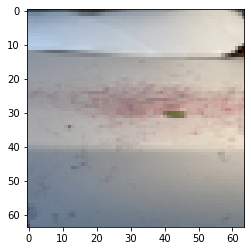

In [9]:
# välj index för bilden
set_type = "train"      # välj set 
index =50                # sätt in index, första bild har index 0

# Testa bilderna i tränintsetet visuellt
if set_type == "train":
    y = train_y[0, index]
    print(set_type+":bild "+ str(index+1)+ " på index "+ str(index))
    print("y = " + str(train_y[0, index])+" ,"+str(classes[train_y[0, index]].decode('utf-8')))
    plt.imshow(train_x_orig[index,:])

# Testa bilderna i testsetet visuellt
elif set_type == "test":
    y = test_set_y[0, index]
    print(set_type+":bild "+ str(index+1)+ " på index "+ str(index))
    print("y = " + str(test_y[0, index])+" ,"+str(classes[test_y[0, index]].decode('utf-8')))
    plt.imshow(test_x_orig[index,:])

In [10]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 211
Number of testing examples: 52
Each image is of size: (64, 64, 3)
train_x_orig shape: (211, 64, 64, 3)
train_y shape: (1, 211)
test_x_orig shape: (52, 64, 64, 3)
test_y shape: (1, 52)


As usual, you reshape and standardize the images before feeding them to the network. The code is given in the cell below.

<img src="images/imvectorkiank_lingon.png" style="width:650px;height:300px;">

<caption><center> <u>Figure 1</u>: Image to vector conversion. <br> </center></caption>

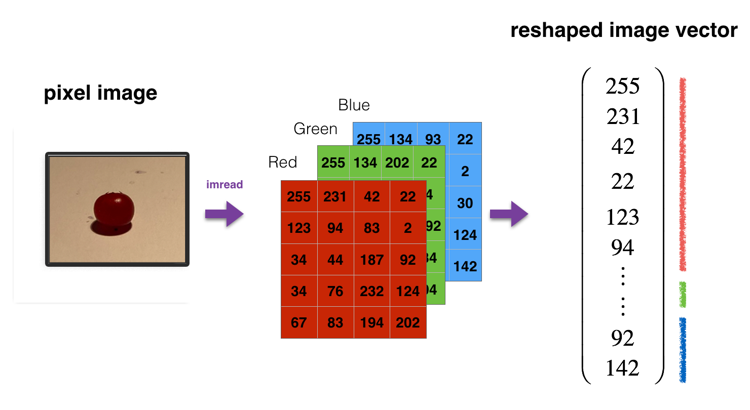

In [11]:
#Only execute to display image in GIT
im_imvectorkiank_lingon = Image.open("images/imvectorkiank_lingon.png")
size = 750, 450
im_imvectorkiank_lingon.thumbnail(size)
display(im_imvectorkiank_lingon)

In [12]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 211)
test_x's shape: (12288, 52)


$12,288$ equals $64 \times 64 \times 3$ which is the size of one reshaped image vector.

## 3 - Architecture of your model

<img src="images/LlayerNN_kiank_lingon.png" style="width:850px;height:400px;">
<caption><center> <u>Figure 3</u>: L-layer neural network. <br> The model can be summarized as: ***[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID***</center></caption>

<u>Detailed Architecture of figure 3</u>:
- The input is a (64,64,3) image which is flattened to a vector of size (12288,1).
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ and then you add the intercept $b^{[1]}$. The result is called the linear unit.
- Next, you take the relu of the linear unit. This process could be repeated several times for each $(W^{[l]}, b^{[l]})$ depending on the model architecture.
- Finally, you take the sigmoid of the final linear unit. If it is greater than 0.5, you classify it to be a cat.

### 3.3 - General methodology

As usual you will follow the Deep Learning methodology to build the model:<br>
    1. Initialize parameters / Define hyperparameters<br>
    2. Loop for num_iterations:<br>
    <BLOCKQUOTE>
        a. Forward propagation<br>
        b. Compute cost function<br>
        c. Backward propagation<br>
        d. Update parameters (using parameters, and grads from backprop)<br> 
    </BLOCKQUOTE>
    4. Use trained parameters to predict labels<br>

Let's now implement those two models!

Now that you are familiar with the dataset, it is time to build a deep neural network to distinguish cat images from non-cat images.

You will build two different models:
- A 2-layer neural network
- An L-layer deep neural network

You will then compare the performance of these models, and also try out different values for $L$. 

Let's look at the two architectures


### 3.1 - 2-layer neural network


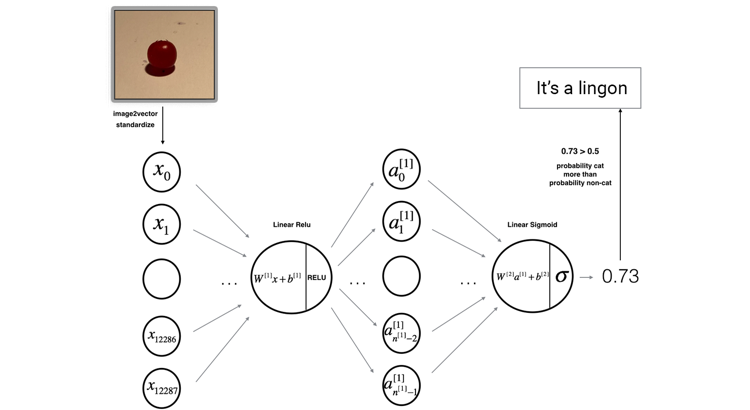

In [13]:
#Only execute to enable display image in GIT
two_layerNN_kiank_lingon = Image.open("images/2layerNN_kiank_lingon.png")
size = 750, 750
two_layerNN_kiank_lingon.thumbnail(size)
display(two_layerNN_kiank_lingon)


<img src="images/2layerNN_kiank_lingon.png" style="width:850px;height:400px;">
<caption><center> <u>Figure 2</u>: 2-layer neural network. <br> The model can be summarized as: ***INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT***. </center></caption>

<u>Detailed Architecture of figure 2</u>:
- The input is a (64,64,3) image which is flattened to a vector of size $(12288,1)$. 
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ of size $(n^{[1]}, 12288)$.
- You then add a bias term and take its relu to get the following vector: $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- You then repeat the same process.
- You multiply the resulting vector by $W^{[2]}$ and add your intercept (bias). 
- Finally, you take the sigmoid of the result. If it is greater than 0.5, you classify it to be a lingon.

### 3.2 - L-layer deep neural network

It is hard to represent an L-layer deep neural network with the above representation. However, here is a simplified network representation:

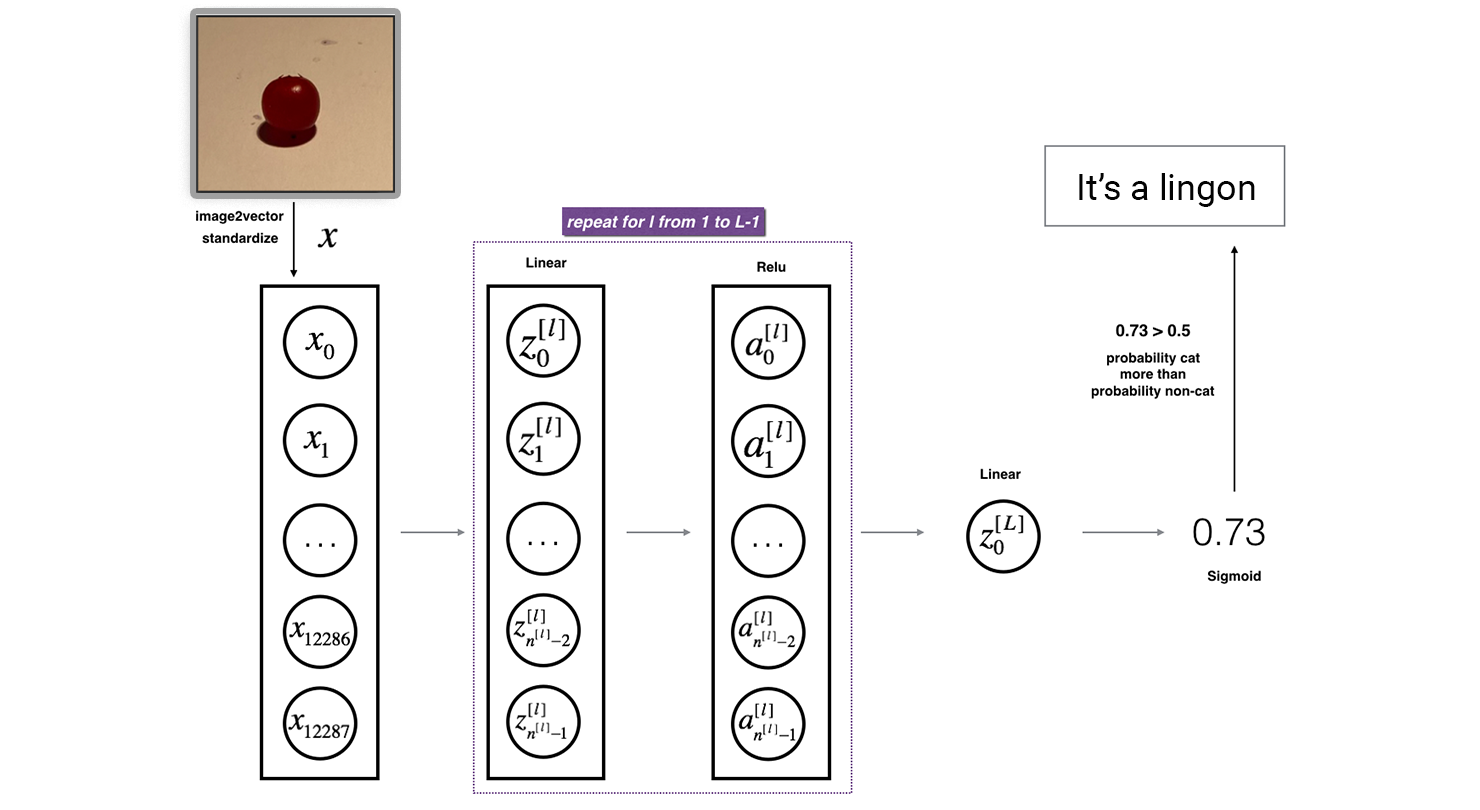

In [15]:
#Only execute to enable display image in GIT
LayerNN_kiank_lingon = Image.open("images/LlayerNN_kiank_lingon.png")
size = 750, 750
#LlayerNN_kiank_lingon.thumbnail(size)
display(LayerNN_kiank_lingon)

<img src="images/LlayerNN_kiank_lingon.png" style="width:850px;height:400px;">
<caption><center> <u>Figure 3</u>: L-layer neural network. <br> The model can be summarized as: ***[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID***</center></caption>

<u>Detailed Architecture of figure 3</u>:
- The input is a (64,64,3) image which is flattened to a vector of size (12288,1).
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ and then you add the intercept $b^{[1]}$. The result is called the linear unit.
- Next, you take the relu of the linear unit. This process could be repeated several times for each $(W^{[l]}, b^{[l]})$ depending on the model architecture.
- Finally, you take the sigmoid of the final linear unit. If it is greater than 0.5, you classify it to be a cat.

### 3.3 - General methodology

As usual you will follow the Deep Learning methodology to build the model:<br>
    1. Initialize parameters / Define hyperparameters<br>
    2. Loop for num_iterations:<br>
    <BLOCKQUOTE>
        a. Forward propagation<br>
        b. Compute cost function<br>
        c. Backward propagation<br>
        d. Update parameters (using parameters, and grads from backprop)<br> 
    </BLOCKQUOTE>
    4. Use trained parameters to predict labels<br>

Let's now implement those two models!

## 4 - Two-layer neural network

**Question**:  Use the helper functions you have implemented in the previous assignment to build a 2-layer neural network with the following structure: *LINEAR -> RELU -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [16]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [17]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters =  initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, activation = "relu")
        A2, cache2 = linear_activation_forward(A1, W2,b2, activation = "sigmoid")
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost (A2,Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters =  update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Run the cell below to train your parameters. See if your model runs. The cost should be decreasing. It may take up to 5 minutes to run 2500 iterations. Check if the "Cost after iteration 0" matches the expected output below, if not click on the square (⬛) on the upper bar of the notebook to stop the cell and try to find your error.

Cost after iteration 0: 0.6916642892188141
Cost after iteration 100: 0.5602348481327554
Cost after iteration 200: 0.33713904572940623
Cost after iteration 300: 0.2387577658364884
Cost after iteration 400: 0.18094201796351625
Cost after iteration 500: 0.13843047893756621
Cost after iteration 600: 0.10746922889042206
Cost after iteration 700: 0.08605470796122104
Cost after iteration 800: 0.07150530506736132
Cost after iteration 900: 0.06131682062438311
Cost after iteration 1000: 0.053747007114647395
Cost after iteration 1100: 0.047753675418931836
Cost after iteration 1200: 0.04274258075467411
Cost after iteration 1300: 0.03837890882680761
Cost after iteration 1400: 0.03447630512649107
Cost after iteration 1500: 0.030941046880469954
Cost after iteration 1600: 0.02773492127280207
Cost after iteration 1700: 0.024851690933166845
Cost after iteration 1800: 0.02230037664826081
Cost after iteration 1900: 0.02008208330269485
Cost after iteration 2000: 0.018180860933885806
Cost after iteration 21

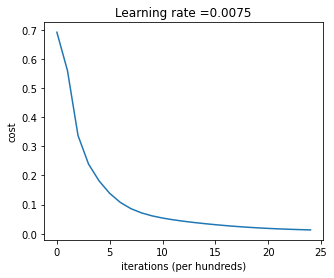

Trained 42.15 seconds


In [18]:
tic = time.perf_counter()
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)
toc = time.perf_counter()
print(f"Trained {toc - tic:0.2f} seconds")

**Expected Output**:
<table> 
    <tr>
        <td> **Cost after iteration 0**</td>
        <td> 0.6930497356599888 </td>
    </tr>
    <tr>
        <td> **Cost after iteration 100**</td>
        <td> 0.6464320953428849 </td>
    </tr>
    <tr>
        <td> **...**</td>
        <td> ... </td>
    </tr>
    <tr>
        <td> **Cost after iteration 2400**</td>
        <td> 0.048554785628770226 </td>
    </tr>
</table>

Good thing you built a vectorized implementation! Otherwise it might have taken 10 times longer to train this.

Now, you can use the trained parameters to classify images from the dataset. To see your predictions on the training and test sets, run the cell below.

In [19]:
predictions_train = predict(train_x, train_y, parameters)
#print(predictions_train)
#print(train_y)

Accuracy: 0.9952606635071092


**Expected Output**:
<table> 
    <tr>
        <td> **Accuracy**</td>
        <td> 1.0 </td>
    </tr>
</table>

In [20]:
tic = time.perf_counter()
predictions_dev = predict(test_x, test_y, parameters)
toc = time.perf_counter()
print(f"Trained {toc - tic:0.2f} seconds")

Accuracy: 1.0000000000000002
Trained 0.00 seconds


**Expected Output**:

<table> 
    <tr>
        <td> **Accuracy**</td>
        <td> 0.72 </td>
    </tr>
</table>

**Note**: You may notice that running the model on fewer iterations (say 1500) gives better accuracy on the test set. This is called "early stopping" and we will talk about it in the next course. Early stopping is a way to prevent overfitting. 

Congratulations! It seems that your 2-layer neural network has better performance (72%) than the logistic regression implementation (70%, assignment week 2). Let's see if you can do even better with an $L$-layer model.

### Evaulation metrics - precision and recall ###

In [28]:
# Precision and recall - train
precision_recall(predictions_train, train_y, "Train")

Train set evaluation metrics
Precision: 100%
Recall: 99%
Lingon in trainset:  74
Predicted to be lingon:  73
Incorrectly predicted to be a lingon: 0
Correctly predicted to be a lingon:  73
Incorrectly predicted not to be a lingon (icke-lingon):  1


In [29]:
# Precision and recall - dev/test
precision_recall(predictions_dev, test_y, "Development")

Development set evaluation metrics
Precision: 100%
Recall: 100%
Lingon in trainset:  34
Predicted to be lingon:  34
Incorrectly predicted to be a lingon: 0
Correctly predicted to be a lingon:  34
Incorrectly predicted not to be a lingon (icke-lingon):  0


#### Test with a test set ####

In [32]:
#Select testset from available lingonsets
#List of available datasets
set_dir = "../Create_hdf5_datasets/data_sets"

for data_set in os.listdir(set_dir):
    print(data_set)


First_lr_test_m52_1024x1024x3_T0.65.h5
First_lr_test_m52_128x128x3_T0.65.h5
First_lr_test_m52_256x256x3_T0.65.h5
First_lr_test_m52_512x512x3_T0.65.h5
First_lr_test_m52_64x64x3_T0.65.h5
First_lr_train_m210_1024x1024x3_T0.35.h5
First_lr_train_m210_128x128x3_T0.35.h5
First_lr_train_m210_256x256x3_T0.35.h5
First_lr_train_m210_512x512x3_T0.35.h5
First_lr_train_m210_64x64x3_T0.35.h5
Second_lr_test_m100_1024x1024x3_T0.30.h5
Second_lr_test_m100_128x128x3_T0.30.h5
Second_lr_test_m100_256x256x3_T0.30.h5
Second_lr_test_m100_512x512x3_T0.30.h5
Second_lr_test_m100_64x64x3_T0.30.h5
Singel_lingon_scrap_berries_inhouse_m1000_1024x1024x3_T0.40.h5
Singel_lingon_scrap_berries_inhouse_m1000_128x128x3_T0.40.h5
Singel_lingon_scrap_berries_inhouse_m1000_256x256x3_T0.40.h5
Singel_lingon_scrap_berries_inhouse_m1000_512x512x3_T0.40.h5
Singel_lingon_scrap_berries_inhouse_m1000_64x64x3_T0.40.h5
Singel_lingon_scrap_berries_inhouse_m211_1024x1024x3_T0.35.h5
Singel_lingon_scrap_berries_inhouse_m211_128x128x3_T0.35.h

In [31]:
test_set_x_orig, test_set_y, test_set_images, classes = load_lingonset('Singel_lingon_scrap_berries_inhouse_m1000_64x64x3_T0.40.h5')

In [32]:
# Reshape the training and test examples 
test_set_x= test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions

# Standardize data to have feature values between 0 and 1.
test_set_x = test_set_x/255.

print ("test_x's shape: " + str(test_set_x.shape))


test_x's shape: (12288, 1000)


In [33]:
#Make prediction
tic = time.perf_counter()
predictions_test = predict(test_set_x, test_set_y, parameters)
toc = time.perf_counter()
print(f"Trained {toc - tic:0.2f} seconds")
#print(predictions_test)
#print(test_set_y)

Accuracy: 0.9120000000000004
Trained 0.01 seconds


In [34]:
# Precision and recall - dev/test
precision_recall(predictions_test, test_set_y, "Test")

Test set evaluation metrics
Precision: 100%
Recall: 78%
Lingon in trainset:  400
Predicted to be lingon:  312
Incorrectly predicted to be a lingon: 0
Correctly predicted to be a lingon:  312
Incorrectly predicted not to be a lingon (icke-lingon):  88


## 5 - L-layer Neural Network  

**Question**: Use the helper functions you have implemented previously to build an $L$-layer neural network with the following structure: *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters_deep(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

### Load pre-preprocess the sets ###

In [35]:
#List available datasets
set_dir = "../Create_hdf5_datasets/data_sets"

for data_set in os.listdir(set_dir):
    print(data_set)

First_lr_test_m52_1024x1024x3_T0.65.h5
First_lr_test_m52_128x128x3_T0.65.h5
First_lr_test_m52_256x256x3_T0.65.h5
First_lr_test_m52_512x512x3_T0.65.h5
First_lr_test_m52_64x64x3_T0.65.h5
First_lr_train_m210_1024x1024x3_T0.35.h5
First_lr_train_m210_128x128x3_T0.35.h5
First_lr_train_m210_256x256x3_T0.35.h5
First_lr_train_m210_512x512x3_T0.35.h5
First_lr_train_m210_64x64x3_T0.35.h5
Second_lr_test_m100_1024x1024x3_T0.30.h5
Second_lr_test_m100_128x128x3_T0.30.h5
Second_lr_test_m100_256x256x3_T0.30.h5
Second_lr_test_m100_512x512x3_T0.30.h5
Second_lr_test_m100_64x64x3_T0.30.h5
Singel_lingon_scrap_berries_inhouse_m1000_1024x1024x3_T0.40.h5
Singel_lingon_scrap_berries_inhouse_m1000_128x128x3_T0.40.h5
Singel_lingon_scrap_berries_inhouse_m1000_256x256x3_T0.40.h5
Singel_lingon_scrap_berries_inhouse_m1000_512x512x3_T0.40.h5
Singel_lingon_scrap_berries_inhouse_m1000_64x64x3_T0.40.h5
Singel_lingon_scrap_berries_inhouse_m211_1024x1024x3_T0.35.h5
Singel_lingon_scrap_berries_inhouse_m211_128x128x3_T0.35.h

In [36]:
#Load the selected trainset with classes, imagenames in sequence, datalabels with load_lingonset ("name of set")  within lingon_hdf_util
train_x_orig, train_y, train_set_images, classes = load_lingonset('Singel_lingon_scrap_berries_inhouse_m211_64x64x3_T0.35.h5')

In [37]:
#Load dev/testestet 
test_x_orig, test_y, _, _ = load_lingonset('Singel_lingon_scrap_berries_inhouse_m52_64x64x3_T0.65.h5')

In [38]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 211)
test_x's shape: (12288, 52)


### Train and evaluate L-layer network ###

In [39]:
### CONSTANTS ###
layers_dims = [12288, 5, 5, 1] #layers_dims = [12288,7, 5, 1]   3-layer model#layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [40]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches =L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
             
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

You will now train the model as a 4-layer neural network. 

Run the cell below to train your model. The cost should decrease on every iteration. It may take up to 5 minutes to run 2500 iterations. Check if the "Cost after iteration 0" matches the expected output below, if not click on the square (⬛) on the upper bar of the notebook to stop the cell and try to find your error.

Cost after iteration 0: 0.813216
Cost after iteration 100: 0.560042
Cost after iteration 200: 0.387430
Cost after iteration 300: 0.358362
Cost after iteration 400: 0.343969
Cost after iteration 500: 0.305128
Cost after iteration 600: 0.286735
Cost after iteration 700: 0.277437
Cost after iteration 800: 0.258139
Cost after iteration 900: 0.246548
Cost after iteration 1000: 0.235997
Cost after iteration 1100: 0.227182
Cost after iteration 1200: 0.218503
Cost after iteration 1300: 0.211044
Cost after iteration 1400: 0.205656
Cost after iteration 1500: 0.201571
Cost after iteration 1600: 0.194354
Cost after iteration 1700: 0.190112
Cost after iteration 1800: 0.186231
Cost after iteration 1900: 0.182726
Cost after iteration 2000: 0.179560
Cost after iteration 2100: 0.176851
Cost after iteration 2200: 0.174274
Cost after iteration 2300: 0.171927
Cost after iteration 2400: 0.169715


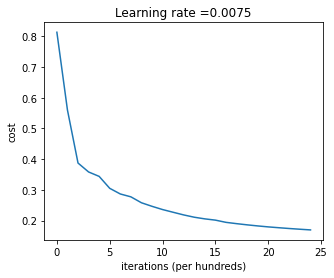

Trained 41.83 seconds


In [41]:
tic = time.perf_counter()
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)
toc = time.perf_counter()
print(f"Trained {toc - tic:0.2f} seconds")

**Expected Output**:
<table> 
    <tr>
        <td> **Cost after iteration 0**</td>
        <td> 0.771749 </td>
    </tr>
    <tr>
        <td> **Cost after iteration 100**</td>
        <td> 0.672053 </td>
    </tr>
    <tr>
        <td> **...**</td>
        <td> ... </td>
    </tr>
    <tr>
        <td> **Cost after iteration 2400**</td>
        <td> 0.092878 </td>
    </tr>
</table>

In [42]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9478672985781991


<table>
    <tr>
    <td>
    **Train Accuracy**
    </td>
    <td>
    0.985645933014
    </td>
    </tr>
</table>

In [43]:
tic = time.perf_counter()
pred_test = predict(test_x, test_y, parameters)
toc = time.perf_counter()
print(f"Trained {toc - tic:0.2f} seconds")

Accuracy: 0.980769230769231
Trained 0.00 seconds


**Expected Output**:

<table> 
    <tr>
        <td> **Test Accuracy**</td>
        <td> 0.8 </td>
    </tr>
</table>

Congrats! It seems that your 4-layer neural network has better performance (80%) than your 2-layer neural network (72%) on the same test set. 

This is good performance for this task. Nice job! 

Though in the next course on "Improving deep neural networks" you will learn how to obtain even higher accuracy by systematically searching for better hyperparameters (learning_rate, layers_dims, num_iterations, and others you'll also learn in the next course). 

Conclusion: It was not possible to run a 4-layer network on this "easy" data, 3 layer was ok. Need to analyse i.e try with other data and also verify code.  

##  6) Results Analysis

First, let's take a look at some images the L-layer model labeled incorrectly. This will show a few mislabeled images. 

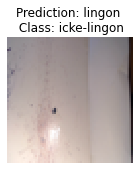

In [44]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

**A few types of images the model tends to do poorly on include:** 
- Berry in an unusual position
- Berry appears against a background of a similar color
- Unusual color, scrap or berry 
- Camera Angle
- Brightness of the picture
- Scale variation (cat is very large or small in image) 

### Key evaluation metrics ###

#### Train-metrics ####

In [45]:
# Precision and recall - Train
precision_recall(predictions_train, train_y, "Train")

Train set evaluation metrics
Precision: 100%
Recall: 99%
Lingon in trainset:  74
Predicted to be lingon:  73
Incorrectly predicted to be a lingon: 0
Correctly predicted to be a lingon:  73
Incorrectly predicted not to be a lingon (icke-lingon):  1


####  Dev-test metrics ####

In [46]:
# Precision and recall - Train
precision_recall(predictions_dev, test_y, "Development")

Development set evaluation metrics
Precision: 100%
Recall: 100%
Lingon in trainset:  34
Predicted to be lingon:  34
Incorrectly predicted to be a lingon: 0
Correctly predicted to be a lingon:  34
Incorrectly predicted not to be a lingon (icke-lingon):  0


## 7) Test with your own image (optional/ungraded exercise) ##

Congratulations on finishing this assignment. You can use your own image and see the output of your model. To do that:
    1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your Coursera Hub.
    2. Add your image to this Jupyter Notebook's directory, in the "images" folder
    3. Change your image's name in the following code
    4. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

(12288, 1)
Accuracy: 1.0
y = 0.0, your L-layer model predicts a "icke-lingon" picture.


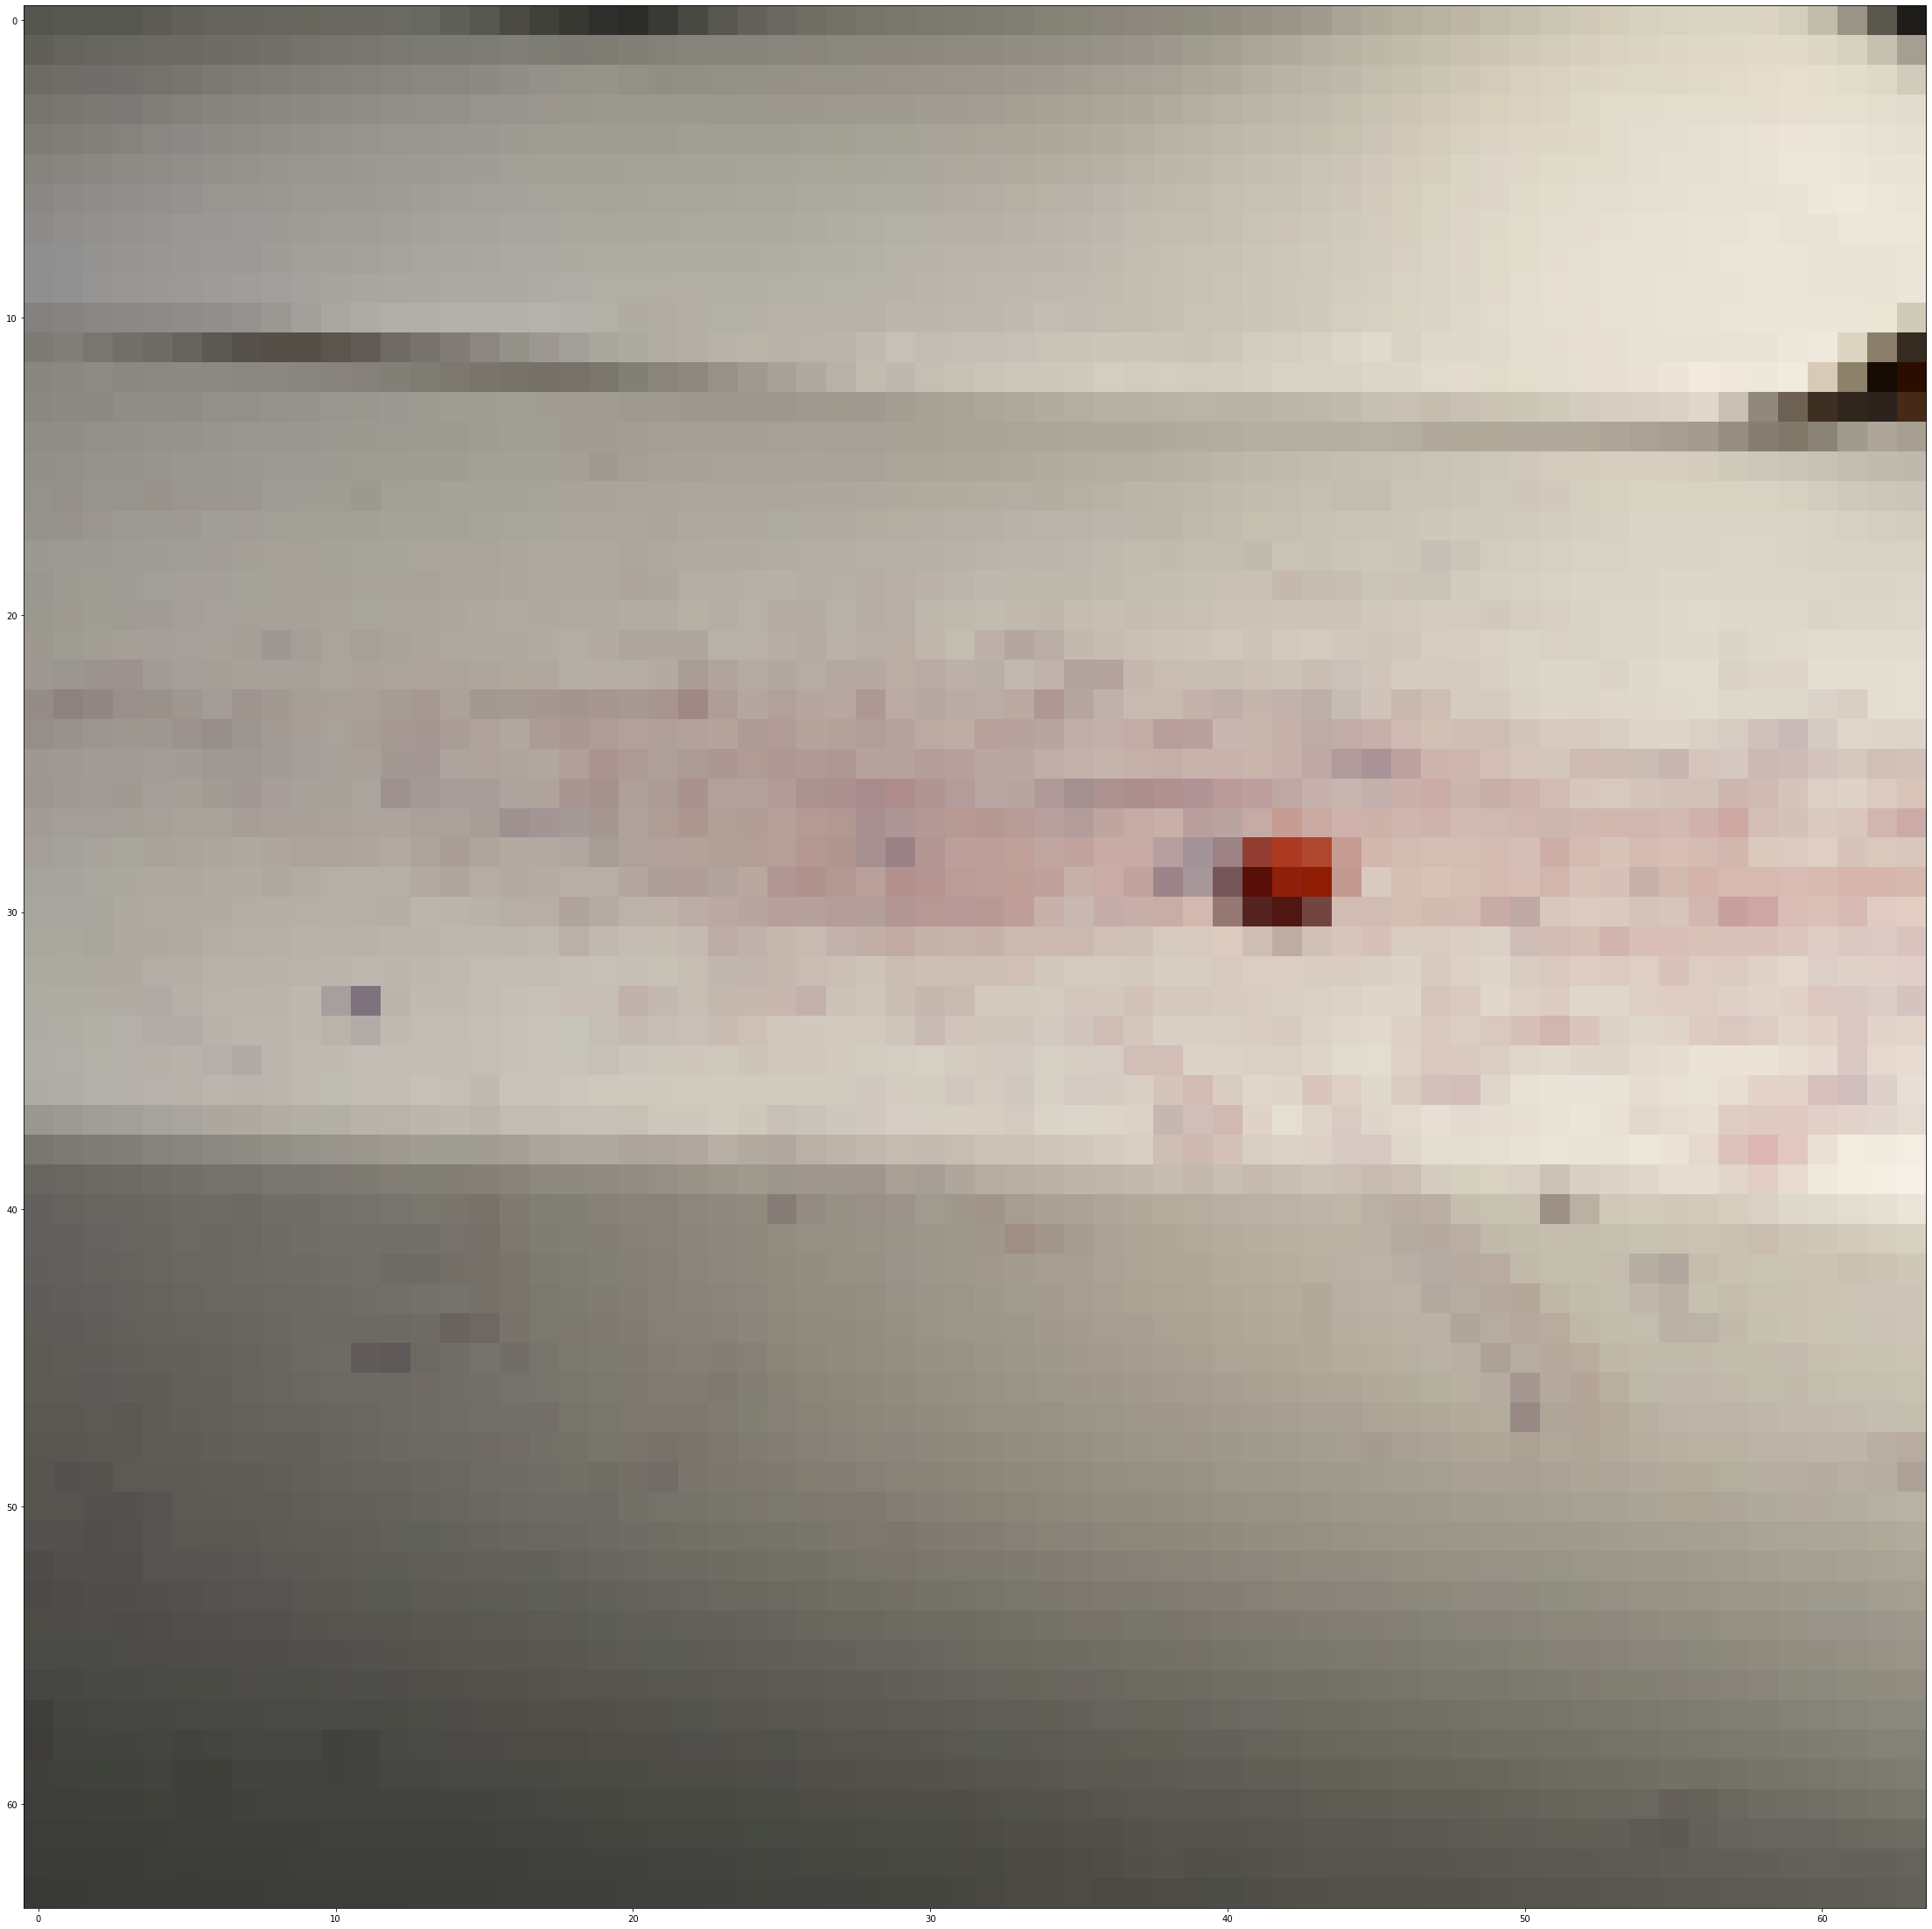

In [47]:
## START CODE HERE ##
my_image = "rönnbär1.JPEG" # change this to the name of your image file 
my_label_y = [0] # the true class of your image (1 -> lingon, 0 -> icke-lingon)
## END CODE HERE ##

fname = "images/" + my_image
image_conv = Image.open(fname)
image_conv = image_conv.resize((num_px,num_px))
image = np.asarray(image_conv)
image = image/255.
my_image = image.reshape(1, num_px*num_px*3).T
print(my_image.shape)


my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
#print("y = "+str(np.squeeze(int(my_predicted_image)))+ " , means that algortim predicts: "+ classes[np.squeeze(int(my_predicted_image))])
#plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

##  Run and eveluate trained model on different test sets ##

Purpose is to evaluate lingon- no-lingon model on different test sets e.g.:<br>
    - no-lingon is combination of other berries and scrap <br>
    - no-lingon is other berries  <br>
    - changed number of images of the total test set <br>
     <br>
To do that: <br>
    1. Get a list of directories containing different test sets <br>
    2. Call for utility that prepare the selected test set  <br>
    3. Run and eveluate testset on algoritm to check if it is right (lingon , no-lingon)  <br>
    4. Run the code and check if the algorithm is right (1 = lingon, 0 = icke-lingon)!  <br>
 <a id='ankare_1'></a>

### Call for a test set and re-evaluate the algoritm ###

In [48]:
#List available datasets
set_dir = "../Create_hdf5_datasets/data_sets"

for data_set in os.listdir(set_dir):
    print(data_set)

First_lr_test_m52_1024x1024x3_T0.65.h5
First_lr_test_m52_128x128x3_T0.65.h5
First_lr_test_m52_256x256x3_T0.65.h5
First_lr_test_m52_512x512x3_T0.65.h5
First_lr_test_m52_64x64x3_T0.65.h5
First_lr_train_m210_1024x1024x3_T0.35.h5
First_lr_train_m210_128x128x3_T0.35.h5
First_lr_train_m210_256x256x3_T0.35.h5
First_lr_train_m210_512x512x3_T0.35.h5
First_lr_train_m210_64x64x3_T0.35.h5
Second_lr_test_m100_1024x1024x3_T0.30.h5
Second_lr_test_m100_128x128x3_T0.30.h5
Second_lr_test_m100_256x256x3_T0.30.h5
Second_lr_test_m100_512x512x3_T0.30.h5
Second_lr_test_m100_64x64x3_T0.30.h5
Singel_lingon_scrap_berries_inhouse_m1000_1024x1024x3_T0.40.h5
Singel_lingon_scrap_berries_inhouse_m1000_128x128x3_T0.40.h5
Singel_lingon_scrap_berries_inhouse_m1000_256x256x3_T0.40.h5
Singel_lingon_scrap_berries_inhouse_m1000_512x512x3_T0.40.h5
Singel_lingon_scrap_berries_inhouse_m1000_64x64x3_T0.40.h5
Singel_lingon_scrap_berries_inhouse_m211_1024x1024x3_T0.35.h5
Singel_lingon_scrap_berries_inhouse_m211_128x128x3_T0.35.h

In [51]:
test_set_x_orig, test_set_y, test_set_images, classes = load_lingonset('Singel_lingon_scrap_berries_inhouse_m1000_64x64x3_T0.40.h5')

In [49]:
# Reshape the training and test examples 
test_set_x= test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions

# Standardize data to have feature values between 0 and 1.
test_set_x = test_set_x/255.

print ("test_x's shape: " + str(test_set_x.shape))


test_x's shape: (12288, 1000)


In [50]:
tic = time.perf_counter()
predictions_test = predict(test_set_x, test_set_y, parameters)
toc = time.perf_counter()
print(f"Trained {toc - tic:0.2f} seconds")

Accuracy: 0.7960000000000003
Trained 0.01 seconds


In [51]:
# Precision and recall - Train
precision_recall(predictions_test, test_set_y, "Test")

Test set evaluation metrics
Precision: 83%
Recall: 62%
Lingon in trainset:  400
Predicted to be lingon:  296
Incorrectly predicted to be a lingon: 50
Correctly predicted to be a lingon:  246
Incorrectly predicted not to be a lingon (icke-lingon):  154


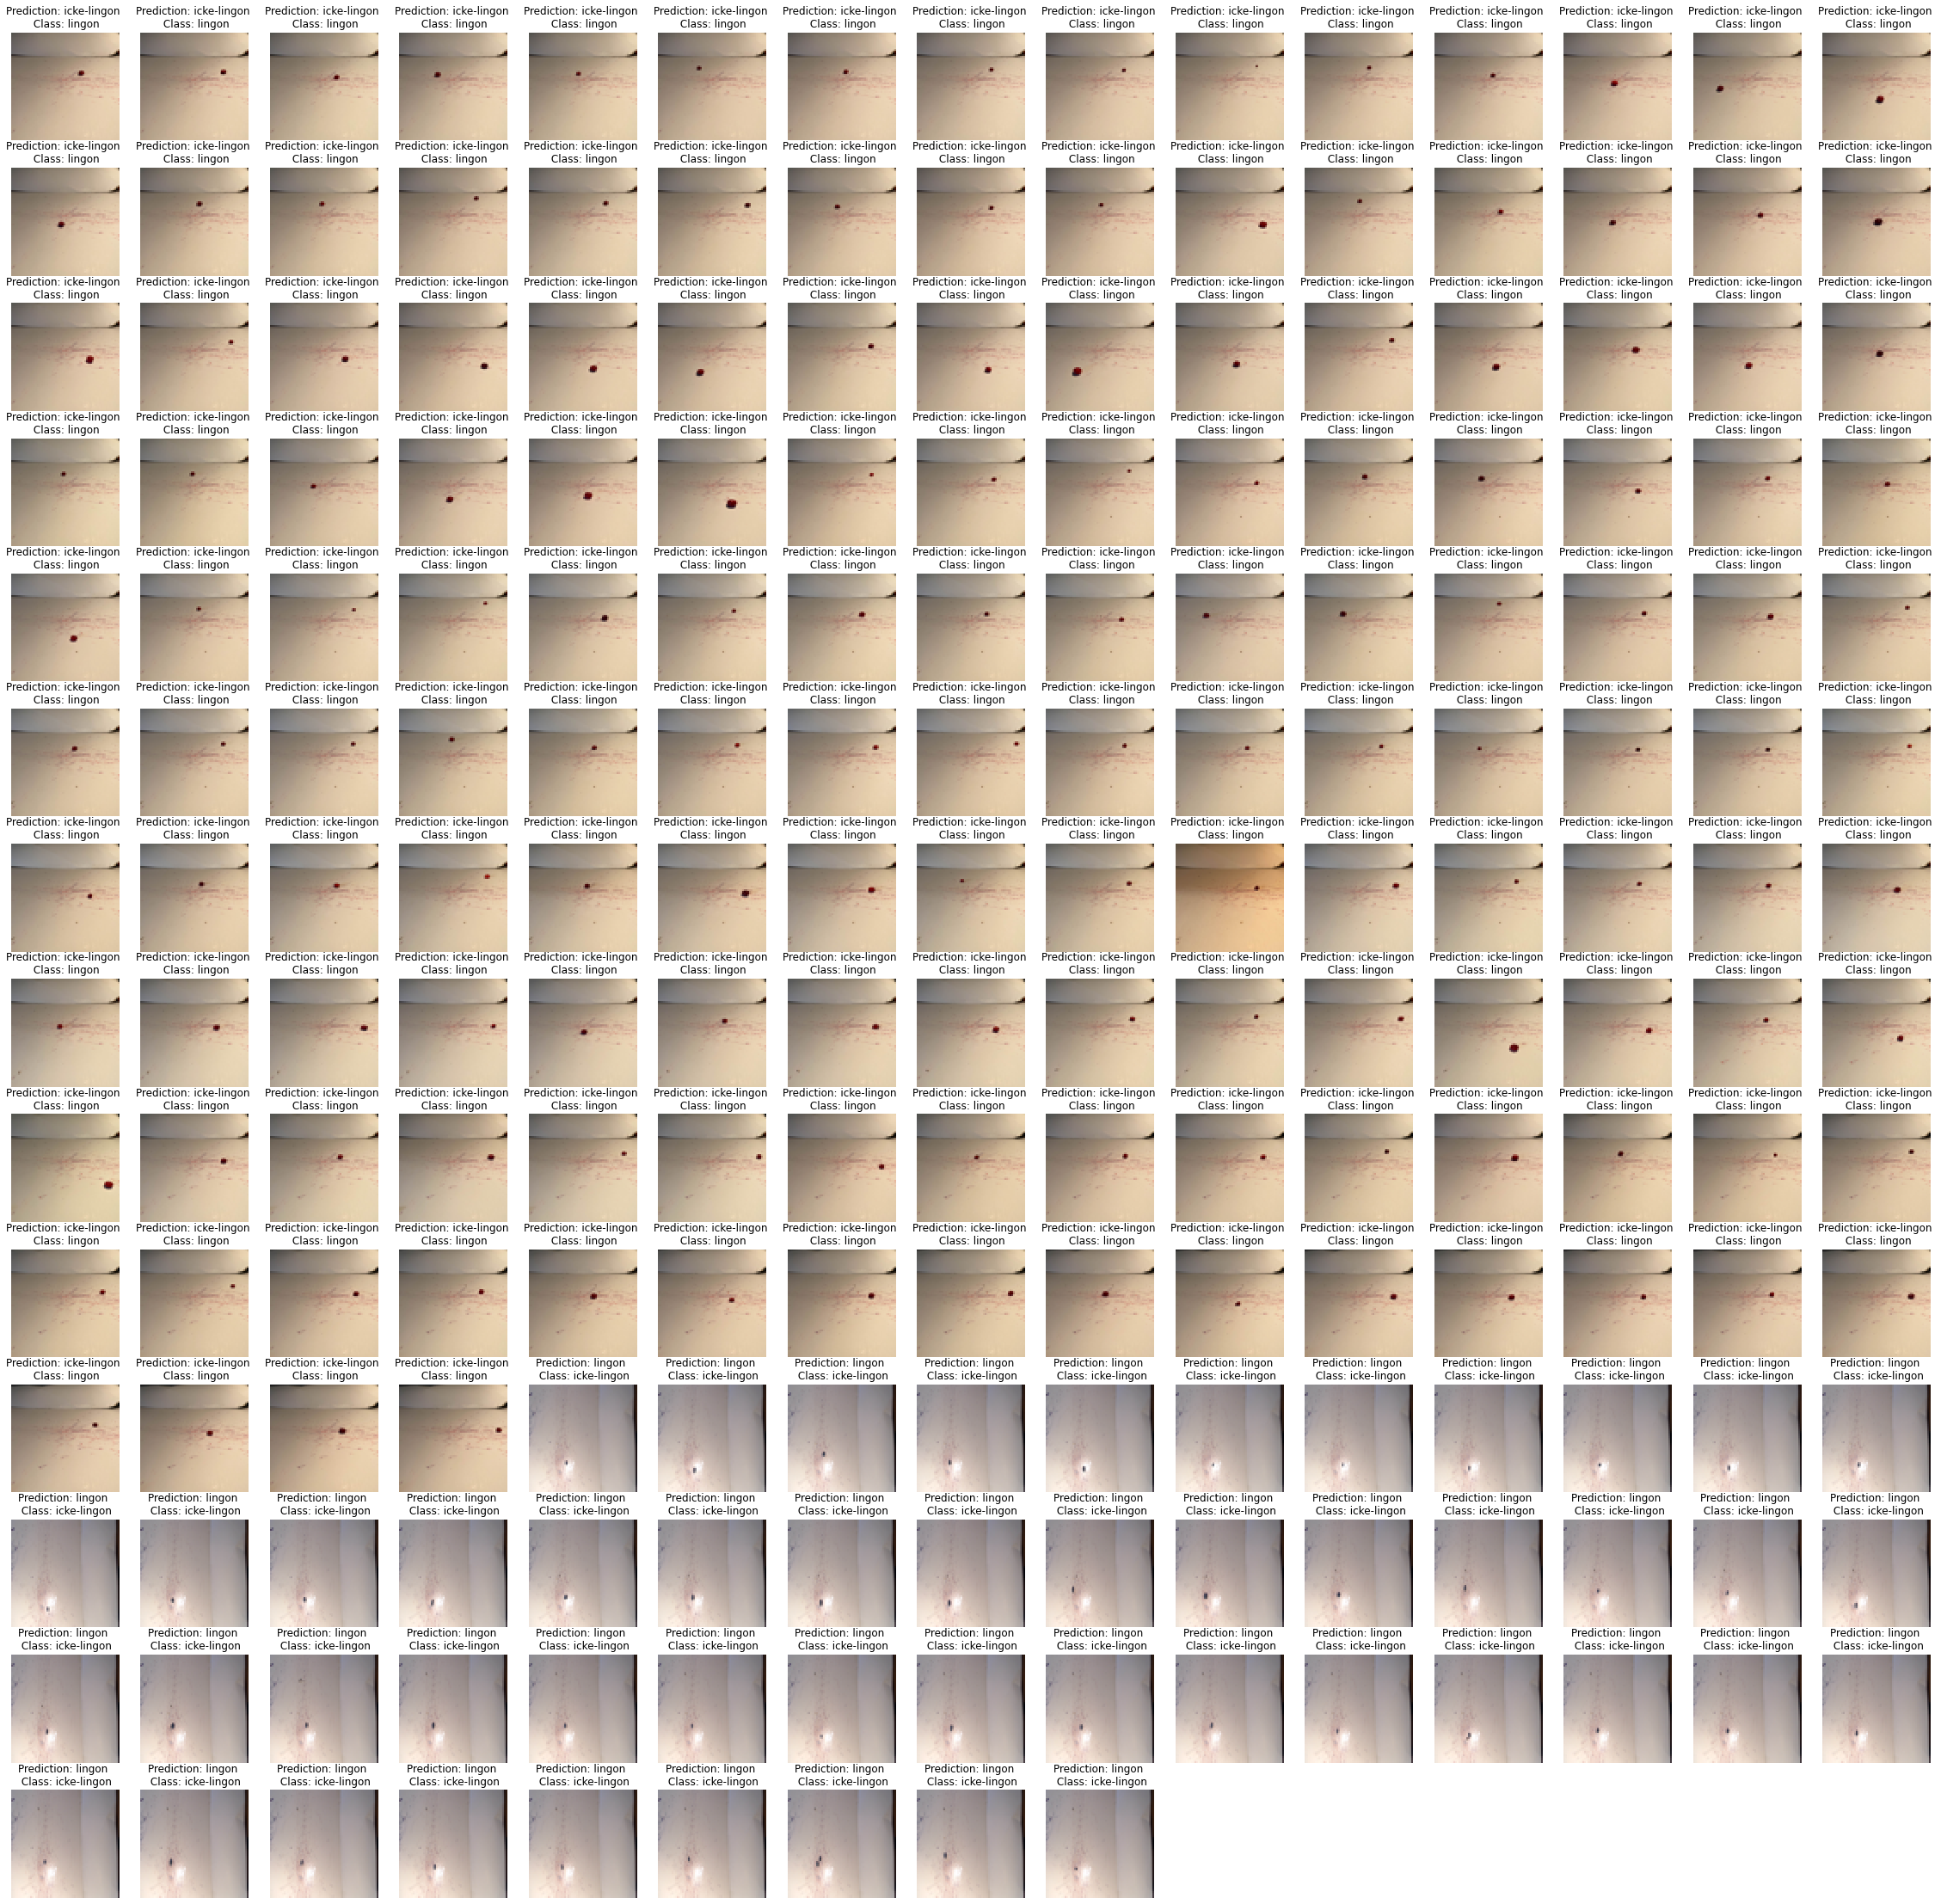

In [56]:
print_mislabeled_images(classes, test_set_x, test_set_y, predictions_test)

**References**:

- for auto-reloading external module: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython